<a href="https://colab.research.google.com/github/CE0-MOEK/CE0-MOEK/blob/main/tryingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.MNIST(root='/firstcnn_data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 50553201.54it/s]


Extracting /firstcnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /firstcnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 2433372.05it/s]


Extracting /firstcnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /firstcnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 13617631.91it/s]


Extracting /firstcnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /firstcnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 7833276.63it/s]

Extracting /firstcnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /firstcnn_data/MNIST/raw



In [ ]:
test_data = datasets.MNIST(root='/firstcnn_data', train = False, download=True, transform=transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /firstcnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /firstcnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_loader = DataLoader(train_data, batch_size=10, shuffle = True)
test_loader = DataLoader(test_data, batch_size=10, shuffle = False)


In [ ]:

# develop the model here
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    # fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x= f.relu(self.conv1(x))
    x= f.max_pool2d(x,2,2)
    x= f.relu(self.conv2(x))
    x= f.max_pool2d(x,2,2)
    # flattern ourt the convolution layer to fit into the nn
    x=x.view(-1,16*5*5)
    # fully connected layer
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.fc3(x)
    return f.log_softmax(x, dim=1)


torch.manual_seed(41)
model = ConvolutionalNetwork()
model


ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import time
start_time = time.time()

# create variable to track things
epoch = 5
train_losses =[]
test_losses = []
train_correct = []
test_correct = []

for i in range(epoch):
  trn_corr = 0
  tst_corr = 0

  for b,(x_train, y_train) in tqdm(enumerate(train_loader)):
    b += 1
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    #update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b} Loss: {loss.item()}')
  train_losses.append(loss)
  train_correct.append(trn_corr)


with torch.no_grad():
  for b, (x_test, y_test) in (enumerate(test_loader)):
    y_val = model(x_test)
    predicted = torch.max(y_val.data, 1)[1]
    tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes')

0it [00:00, ?it/s]

Epoch: 0  Batch: 600 Loss: 0.1623610556125641
Epoch: 0  Batch: 1200 Loss: 0.1502392590045929
Epoch: 0  Batch: 1800 Loss: 0.4744560718536377
Epoch: 0  Batch: 2400 Loss: 0.14238706231117249
Epoch: 0  Batch: 3000 Loss: 0.007758188061416149
Epoch: 0  Batch: 3600 Loss: 0.3836284875869751
Epoch: 0  Batch: 4200 Loss: 0.0038223876617848873
Epoch: 0  Batch: 4800 Loss: 0.0021286322735249996
Epoch: 0  Batch: 5400 Loss: 0.0569545142352581
Epoch: 0  Batch: 6000 Loss: 0.00038789428072050214


0it [00:00, ?it/s]

Epoch: 1  Batch: 600 Loss: 0.06289136409759521
Epoch: 1  Batch: 1200 Loss: 0.010614877566695213
Epoch: 1  Batch: 1800 Loss: 0.03243611007928848
Epoch: 1  Batch: 2400 Loss: 0.012448625639081001
Epoch: 1  Batch: 3000 Loss: 0.000640809943433851
Epoch: 1  Batch: 3600 Loss: 0.0020938280504196882
Epoch: 1  Batch: 4200 Loss: 0.3140248656272888
Epoch: 1  Batch: 4800 Loss: 0.020231451839208603
Epoch: 1  Batch: 5400 Loss: 0.0031914091669023037
Epoch: 1  Batch: 6000 Loss: 0.0009488927898928523


0it [00:00, ?it/s]

Epoch: 2  Batch: 600 Loss: 0.04242878407239914
Epoch: 2  Batch: 1200 Loss: 0.000786997377872467
Epoch: 2  Batch: 1800 Loss: 0.0004456916940398514
Epoch: 2  Batch: 2400 Loss: 0.0021735907066613436
Epoch: 2  Batch: 3000 Loss: 6.313459743978456e-05
Epoch: 2  Batch: 3600 Loss: 0.0014708992093801498
Epoch: 2  Batch: 4200 Loss: 8.743518264964223e-05
Epoch: 2  Batch: 4800 Loss: 0.0011174092069268227
Epoch: 2  Batch: 5400 Loss: 0.00019280910782981664
Epoch: 2  Batch: 6000 Loss: 0.00013335500261746347


0it [00:00, ?it/s]

Epoch: 3  Batch: 600 Loss: 0.20401248335838318
Epoch: 3  Batch: 1200 Loss: 0.0011065044673159719
Epoch: 3  Batch: 1800 Loss: 0.00048520020209252834
Epoch: 3  Batch: 2400 Loss: 0.0013440614566206932
Epoch: 3  Batch: 3000 Loss: 0.00839989073574543
Epoch: 3  Batch: 3600 Loss: 9.791700722416863e-05
Epoch: 3  Batch: 4200 Loss: 0.0046706534922122955
Epoch: 3  Batch: 4800 Loss: 0.002486269222572446
Epoch: 3  Batch: 5400 Loss: 0.03304066136479378
Epoch: 3  Batch: 6000 Loss: 0.0277620367705822


0it [00:00, ?it/s]

Epoch: 4  Batch: 600 Loss: 0.04214929789304733
Epoch: 4  Batch: 1200 Loss: 0.0015658453339710832
Epoch: 4  Batch: 1800 Loss: 4.677330798585899e-05
Epoch: 4  Batch: 2400 Loss: 0.00042244786163792014
Epoch: 4  Batch: 3000 Loss: 0.554036021232605
Epoch: 4  Batch: 3600 Loss: 0.00038964804843999445
Epoch: 4  Batch: 4200 Loss: 0.027548160403966904
Epoch: 4  Batch: 4800 Loss: 0.004602053668349981
Epoch: 4  Batch: 5400 Loss: 0.05360576510429382
Epoch: 4  Batch: 6000 Loss: 0.03545317426323891
Training Took: 4.148065952459971 minutes


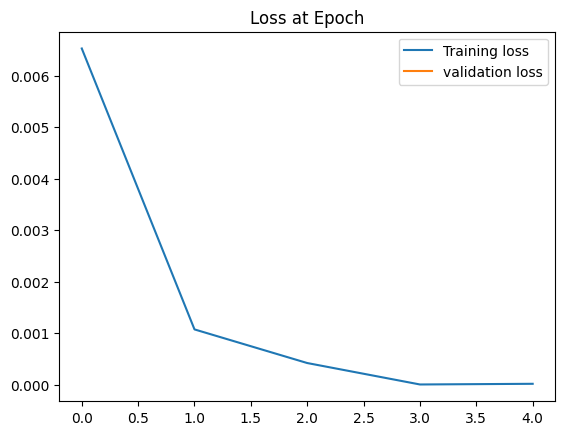

In [ ]:


train_losses = [tl.item() for tl in train_losses]

plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "validation loss")
plt.title("Loss at Epoch")
plt.legend()

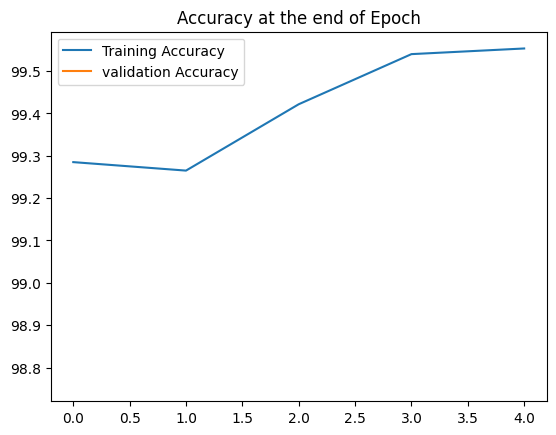

In [ ]:
plt.plot([t/600 for t in train_correct], label = "Training Accuracy")
plt.plot([t/100 for t in test_correct], label = "validation Accuracy")
plt.title("Accuracy at the end of Epoch")
plt.legend()

In [ ]:
test_load_everything=DataLoader(test_data, batch_size=10000, shuffle=False)


with torch.no_grad():
   correct = 0
   for x_test, y_test in test_load_everything:
    y_val = model(x_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()





In [ ]:
 correct.item()/len(test_data)*100

98.76

In [ ]:
test_data[1100][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

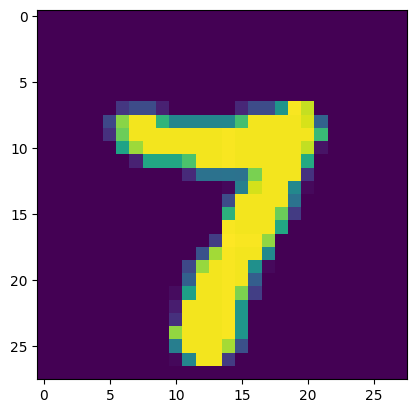

In [ ]:
plt.imshow(test_data[1100][0].reshape(28,28))

In [ ]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[1100][0].view(1,1,28,28))  # batch size of 1, 1 color channel, 28x28


In [ ]:
new_prediction

tensor([[-4.2254e+01, -2.5091e+01, -2.7467e+01, -3.2437e+01, -2.1065e+01,
         -4.1279e+01, -6.9994e+01, -1.6689e-06, -2.6661e+01, -1.3324e+01]])